# Workshop 1.4 Fit happens

*[CEGM1000 MUDE](http://mude.citg.tudelft.nl/)*

*Written by: Max Ramgraber based on a previous version by Patricia Mares Nasarre and Robert Lanzafame*

*Due: `<day of week>`, `<month>` `<day>`, `<year>`.*

Fitting probability distributions to data is an important task in any discipline of science and engineering, as these distributions can be used to derive quantitative statements about risks and frequencies of uncertain properties. Probabilistic tools can be applied to model this uncertainty. In this workshop, you will work with a dataset of your choosing estimate a distribution and evaluate the quality of your fit.

**The goal of this project is:**
1. Choose a reasonable distribution function for the concrete compressive strength analyzing the statistics of the observations.
2. Fit the chosen distributions by moments.
3. Assess the fit computing probabilities analytically.
4. Assess the fit using goodness of fit techniques and computer code.

The project will be divided into 3 parts: 1) data analysis, 2) pen and paper stuff (math practice!), and 3) programming.

In [1]:
# Let us load some required libraries 
import numpy as np                       # For math
import matplotlib.pyplot as plt          # For plotting
from matplotlib.gridspec import GridSpec # For plotting
import pandas as pd                      # For file-wrangling
from scipy import stats                  # For math
from math import ceil, trunc             # For formatting

# This is just cosmetic - it updates the font size for our plots
plt.rcParams.update({'font.size': 14})

**Please choose one of the following datasets:**
1. Observations of the **compressive strength of concrete**. The compressive strength of concrete is key for the safety of infrastructures and buildings. However, a lot of boundary conditions influence the final resistance of the concrete, such the cement content, the environmental temperature or the age of the concrete. (You can read more about the dataset [here](https://www.kaggle.com/datasets/gauravduttakiit/compressive-strength-of-concrete))
2. ERA5 predictions of the **hourly temperature at 2m height** during the summer months (June, July, August) from 2005 to 2025. ERA5 predictions are re-analysis data, which are observation-corrected weather model predictions. Like most climate data, they depend on chaotic global weather dynamics, which precise long-term predictions difficult. (The data set is extracted from [here](https://archive-api.open-meteo.com/v1/era5?latitude=52.00667&longitude=4.35556&start_date=2005-01-01&end_date=2024-12-31&hourly=temperature_2m&timezone=Europe%2FAmsterdam).)

In [10]:
import os
from urllib.request import urlretrieve

def findfile(fname):
    if not os.path.isfile(fname):
        print(f"Downloading {fname}...")
        urlretrieve('http://files.mude.citg.tudelft.nl/'+fname, fname)

findfile('dataset_concrete.csv')
findfile('dataset_temperature.csv')

In [ ]:
# Please choose one of the datasets below
viable_datasets = ["concrete","temperature"]
dataset = "concrete" # Choose one dataset from the list above

# Automated check to see if the user selection is viable
assert dataset in viable_datasets, "Dataset must be in {}. You have selected {}.".format(str(viable_datasets),dataset)

# Load the data
data = np.genfromtxt('dataset_concrete.csv', delimiter=",", skip_header=True)

# Set the axis labels for the dataset
if dataset == "concrete":
    label = "Concrete compressive strength [MPa]"
    number_bins = 10 # Depending on the number of data points, we may want to use different bin numbers for the histogram
elif dataset == "temperature":
    label = "Summer air temperature in Delft [°C]"
    number_bins = 20 # Depending on the number of data points, we may want to use different bin numbers for the histogram

Now, let us clean and plot the data.

772


(-1.6815630164000002, 86.6125956484)

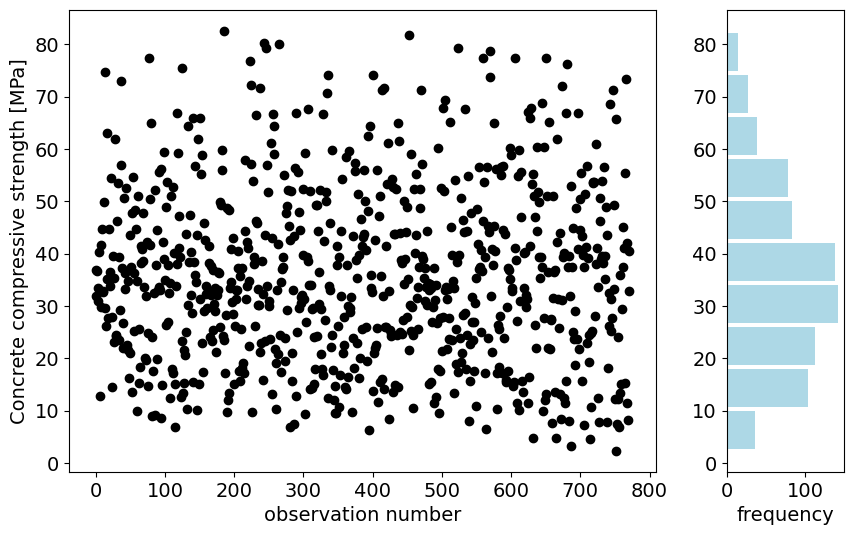

In [3]:
# Clean the data by removing all NaN entries
data = data[~np.isnan(data)]

# Create a figure that shows the time series
plt.figure(figsize=(10, 6))

# GridSpec allows you to specify the size and relative positions of subplots, which can be very useful for plotting
gs = GridSpec(
    nrows = 1, # We want one row
    ncols = 2, # We want two columns
    width_ratios = [1,0.2]) # The second column should only be 20% as wide as the first column

# In the first subplot, we plot the raw data series
plt.subplot(gs[0,0])
plt.plot(data,'ok')
plt.xlabel("observation number")
plt.ylabel(label)
ylims = plt.gca().get_ylim()

print(len(data))

# In the second subplot, we plot the histogram
plt.subplot(gs[0,1])
plt.hist(data, orientation='horizontal', color='lightblue', rwidth=0.9, bins = number_bins)
plt.xlabel("frequency")
plt.gca().set_ylim(ylims)

In the figure above, you can see all the observations of your chosen dataset. You can see that there is no clear pattern in the observations. Let's see how the statistics look like!

In [4]:
# Statistics
df_describe = pd.DataFrame(data)
df_describe.describe()

,0
count,772.000000
mean,35.724196
std,16.797389
min,2.331808
25%,23.677591
50%,33.870853
75%,46.232813
max,82.599225


<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 1.1:</b>   
    Using <b>ONLY</b> the statistics calculated in the previous lines:
    <li>Choose an appropriate distribution to model the data between the following: (1) Gumbel, (2) Uniform, and (3) Gaussian. </li>
    <li>Justiy your choice.</li>
</p>
</div>

_Your answer here._

<div style="background-color:#FAE99E; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">

Solution for the **concrete dataset**:
- Appropriate distribution: *Gumbel*.
- Explanation: Uniform and Gaussian distributions are symmetric so they are not appropriate to model the observations. We can see the asymmetry by computing the difference between the minimum value and the P50% and between the maximum value and P50%:
   - $d_{min, 50} = 33.87-2.33 = 31.54$
   - $d_{50, max} = 82.60 - 33.87 = 48.72$
- Since the $d_{min, 50} < d_{50, max}$, the Gumbel distribution is **right-tailed**.
  
----

Solution for the **temperature dataset**:
- Appropriate distribution: *Gumbel*.
- Explanation: Uniform and Gaussian distributions are symmetric so they are not appropriate to model the observations. We can see the asymmetry by computing the difference between the minimum value and the P50% and between the maximum value and P50%:
   - $d_{min, 50} = 17.0-6.5 = 11.5$
   - $d_{50, max} = 36.7 - 17.0 = 19.3$
- Since the $d_{min, 50} < d_{50, max}$, the Gumbel distribution is **right-tailed**.

</div>

## Part 2: Use pen and paper!

Once you have selected the appropriate distribution, you are going to fit it by moments manually and check the fit by computing some probabilities analytically. Remember that you have all the information you need in the textbook. Do not use any computer code for this section, you have to do in with pen and paper. You can use the notebook as a calculator.

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 2.1:</b>   
Fit the selected distribution by moments.
</p>
</div>

_Your answer here._

<div style="background-color:#FAE99E; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
    
Solution for the **concrete dataset**:

Fitting by moments a distribution implies equating the moments of the observations to those of the parametric distribution. Applying then the expressions of the mean and variance of the Gumbel distribution we obtain:

$
\mathbb{V}ar(X) = \cfrac{\pi^2}{6} \beta^2 \to \beta = \sqrt{\cfrac{6\mathbb{V}ar(X)}{\pi^2}}=\sqrt{\cfrac{6 \cdot 16.797^2}{\pi^2}}= 13.097
$

$
\mathbb{E}(X) = \mu + \gamma \beta \to \mu = \mathbb{E}(X) - \gamma \beta = 35.724 - 0.577 \cdot 13.097 = 28.167
$

where we recall that $\gamma \approx 0.577$ is the Euler-Mascheroni constant.

---------------

Solution for the **temperature dataset**:

Fitting by moments a distribution implies equating the moments of the observations to those of the parametric distribution. Applying then the expressions of the mean and variance of the Gumbel distribution we obtain:
    
$
\mathbb{V}ar(X) = \cfrac{\pi^2}{6} \beta^2 \to \beta = \sqrt{\cfrac{6\mathbb{V}ar(X)}{\pi^2}}=\sqrt{\cfrac{6 \cdot 3.733^2}{\pi^2}}= 2.911
$

$
\mathbb{E}(X) = \mu + \gamma \beta \to \mu = \mathbb{E}(X) - \gamma \beta = 17.407 - 0.577 \cdot 2.911 = 15.727
$

where we recall that $\gamma \approx 0.577$ is the Euler-Mascheroni constant.

</div>

We can now check the fit by computing manually some probabilities from the fitted distribution and comparing them with the empirical ones.

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 2.2:</b>   
Check the fit of the distribution:
    <li>Use the values obtained from the statistical inspection: the min, 25%, 50%, 75% and max values. What are the non-exceedance probabilities (from the empirical distribution) that correspond to those values?</li>
    <li>Compute the values of the random variable corresponding to those probabilities using the fitted distribution.</li>
    <li>Compare the obtained values with the empirical ones and assess the fit.</li>
</p>
You can summarize you answers in the following table (report your values with 3-4 significant digits max, as needed).
</div>


|   |Minimum value|P25%|P50%|P75%|Maximum value|
|---|-------------|----|----|----|-------------|
|Non-exceedance probability [$-$]| | 0.25 | 0.50 | 0.75 |  |
|Empirical quantiles | | | | | |
|Predicted quantiles ||||||

<div style="background-color:#FAE99E; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">

Solution for the **concrete dataset**:
    
|   |Minimum value|P25%|P50%|P75%|Maximum value|
|---|-------------|----|----|----|-------------|
|Non-exceedance probability [$-$]| 1/(772+1)| 0.25 | 0.5 | 0.75 | 772/(772+1) |
|Empirical quantiles [MPa] |2.332|23.678|33.871|46.232|82.599|
|Predicted quantiles [MPa] |3.353|23.889|32.967|44.485|115.257|

Note: you can compute the values of the random variable using the inverse of the CDF of the Gumbel distribution:
     
$
F(x) = e^{\normalsize -e^{\normalsize-\cfrac{x-\mu}{\beta}}} \to x = -\beta \ln\left(-\ln F\left(x\right)\right) + \mu
$

Compare and assess:

The values close to the central moments (P25%, P50% and P75%) are well fitted. Regarding the left tail, the fit is reasonable, since the predicted value for the minimum observation is the same order of magnitude although not accurate. Finally, the right tail is not properly fitted since the estimation for the maximum observation is far from the actual value.   
    
----

Solution for the **temperature dataset**:
    
|   |Minimum value|P25%|P50%|P75%|Maximum value|
|---|-------------|----|----|----|-------------|
|Non-exceedance probability [$-$]| 1/(44160+1)| 0.25 | 0.5 | 0.75 | 44160/(44160+1) |
|Empirical quantiles [°C] |6.5|14.9|17.0|19.5|36.70|
|Predicted quantiles [°C] |8.8|14.8|16.8|19.4|46.9|

Note: you can compute the values of the random variable using the inverse of the CDF of the Gumbel distribution:
     
$
F(x) = e^{\normalsize -e^{\normalsize-\cfrac{x-\mu}{\beta}}} \to x = -\beta \ln\left(-\ln F\left(x\right)\right) + \mu
$

Compare and assess:

The values close to the central moments (P25%, P50% and P75%) are well fitted. Regarding the left tail, the fit is reasonable, since the predicted value for the minimum observation is the same order of magnitude although not accurate. Finally, the right tail is not properly fitted since the estimation for the maximum observation is far from the actual value.   

</div>

## Part 3: Let's do it with Python!

Now, let's assess the performance using further goodness of fit metrics and see whether they are consistent with the previously done analysis.

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 3.1:</b>   
Prepare a function to compute the empirical cumulative distribution function.
</p>
</div>

In [5]:
# def ecdf(YOUR_CODE_HERE):
#     YOUR_CODE_HERE # may be more than one line
#     return YOUR_CODE_HERE

In [5]:
# def ecdf(YOUR_CODE_HERE):
#     YOUR_CODE_HERE # may be more than one line
#     return YOUR_CODE_HERE

# % solution_start
# SOLUTION:
def ecdf(observations):
    x = np.sort(observations)
    n = x.size
    y = np.arange(1, n+1) / (n + 1)
    return [y, x]
# % solution_end

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 3.2:</b>   
Transform the fitted parameters for the selected distribution to loc-scale-shape.
</p>
</div>

Hint: the distributions are in our online textbook, but it is also critical to make sure that the formulation in the book is identical to that of the Python package we are using. You can do this by finding the page of the relevant distribution in the [Scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html) documentation.

_Your answer here._

<div style="background-color:#FAE99E; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">

Solution for the **concrete dataset**:

The Gumbel distribution is already parameterized in terms of loc-scale-shape. You don't need to do anything!

----

Solution for the **temperature dataset**:

The Gumbel distribution is already parameterized in terms of loc-scale-shape. You don't need to do anything!

</div>

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 3.3:</b>   
Assess the goodness of fit of the fitted distribution by:
    <li> Visually comparing the empirical and fitted PDF.</li>
    <li> Using the exceedance plot in log-scale.</li>
    <li> Using the QQplot.</li>
    <li> Interpret them. Do you reach a conclusion similar to that in the previous section?</li>
</p>
</div>

Hint: Use [Scipy](https://docs.scipy.org/doc/scipy/reference/stats.html) built in functions (watch out with the parameters definition!).

In [7]:
# loc = YOUR_CODE_HERE
# scale = YOUR_CODE_HERE

# fig, axes = plt.subplots(1, 1, figsize=(10, 5))
# axes.hist(YOUR_CODE_HERE,
#           edgecolor='k', linewidth=0.2, color='cornflowerblue',
#           label='Empirical PDF', density = True, bins = number_bins)
# axes.plot(YOUR_CODE_HERE, YOUR_CODE_HERE,
#           'k', linewidth=2, label='YOUR_DISTRIBUTION_NAME_HERE PDF')
# axes.set_xlabel(label)
# axes.set_title('PDF', fontsize=18)
# axes.legend()

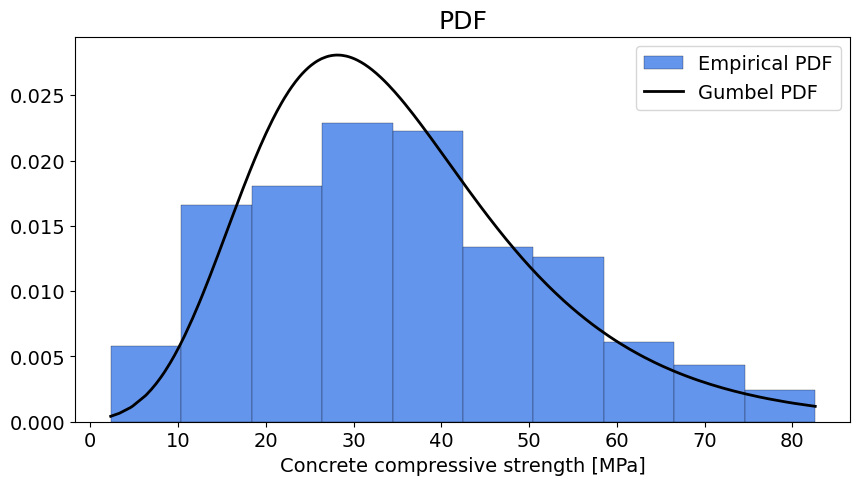

In [6]:
# loc = YOUR_CODE_HERE
# scale = YOUR_CODE_HERE

# fig, axes = plt.subplots(1, 1, figsize=(10, 5))
# axes.hist(YOUR_CODE_HERE,
#           edgecolor='k', linewidth=0.2, color='cornflowerblue',
#           label='Empirical PDF', density = True, bins = number_bins)
# axes.plot(YOUR_CODE_HERE, YOUR_CODE_HERE,
#           'k', linewidth=2, label='YOUR_DISTRIBUTION_NAME_HERE PDF')
# axes.set_xlabel(label)
# axes.set_title('PDF', fontsize=18)
# axes.legend()

# SOLUTION for the CONCRETE dataset
if dataset == "concrete":
    loc = 28.167
    scale = 13.097
    distribution = stats.gumbel_r.pdf(np.sort(data), loc, scale)
    distribution_label = 'Gumbel PDF'
    
# SOLUTION for the TEMPERATURE dataset
elif dataset == "temperature":
    loc = 15.727
    scale = 2.911
    distribution = stats.gumbel_r.pdf(np.sort(data), loc, scale)
    distribution_label = 'Gumbel PDF'

fig, axes = plt.subplots(1, 1, figsize=(10, 5))
axes.hist(data,
          edgecolor='k', linewidth=0.2, color='cornflowerblue',
          label='Empirical PDF', density = True, bins = number_bins)
axes.plot(np.sort(data), distribution,
          'k', linewidth=2, label=distribution_label)
axes.set_xlabel(label)
axes.set_title('PDF', fontsize=18)
axes.legend()
fig.savefig('pdf.svg')

In [9]:
# fig, axes = plt.subplots(1, 1, figsize=(10, 5))

# axes.step(YOUR_CODE_HERE, YOUR_CODE_HERE, 
#           color='k', label='Empirical CDF')
# axes.plot(YOUR_CODE_HERE, YOUR_CODE_HERE,
#           color='cornflowerblue', label='YOUR_DISTRIBUTION_NAME_HERE CDF')
# axes.set_xlabel(label)
# axes.set_ylabel('${P[X > x]}$')
# axes.set_title('Exceedance plot in log-scale', fontsize=18)
# axes.set_yscale('log')
# axes.legend()
# axes.grid()

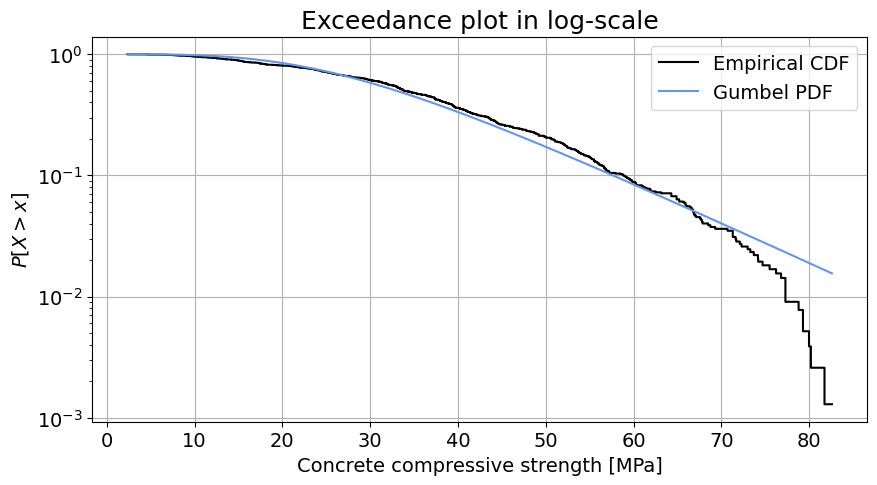

In [7]:
# fig, axes = plt.subplots(1, 1, figsize=(10, 5))

# axes.step(YOUR_CODE_HERE, YOUR_CODE_HERE, 
#           color='k', label='Empirical CDF')
# axes.plot(YOUR_CODE_HERE, YOUR_CODE_HERE,
#           color='cornflowerblue', label='YOUR_DISTRIBUTION_NAME_HERE CDF')
# axes.set_xlabel(label)
# axes.set_ylabel('${P[X > x]}$')
# axes.set_title('Exceedance plot in log-scale', fontsize=18)
# axes.set_yscale('log')
# axes.legend()
# axes.grid()

# SOLUTION for the CONCRETE dataset
if dataset == "concrete":
    loc = 28.167
    scale = 13.097
    cdf = stats.gumbel_r.cdf(ecdf(data)[1], loc, scale)
    distribution_label = 'Gumbel PDF'
    
# SOLUTION for the TEMPERATURE dataset
elif dataset == "temperature":
    loc = 15.727
    scale = 2.911
    cdf = stats.gumbel_r.cdf(ecdf(data)[1], loc, scale)
    distribution_label = 'Gumbel PDF'

# SOLUTION
fig, axes = plt.subplots(1, 1, figsize=(10, 5))

axes.step(ecdf(data)[1], 1-ecdf(data)[0], 
          color='k', label='Empirical CDF')
axes.plot(ecdf(data)[1], 1-cdf,
          color='cornflowerblue', label=distribution_label)
axes.set_xlabel(label)
axes.set_ylabel('${P[X > x]}$')
axes.set_title('Exceedance plot in log-scale', fontsize=18)
axes.set_yscale('log')
axes.legend()
axes.grid()
fig.savefig('cdf.svg')

In [11]:
# fig, axes = plt.subplots(1, 1, figsize=(10, 5))

# axes.scatter(YOUR_CODE_HERE, YOUR_CODE_HERE, 
#              color='cornflowerblue', label='Gumbel')
# axes.set_xlabel('Observed '+label)
# axes.set_ylabel('Estimated '+label)
# axes.set_title('QQplot', fontsize=18)
# xlims = axes.get_xlim()
# ylims = axes.get_ylim()
# axes.plot([np.min([xlims[0],ylims[0]]), np.max([xlims[1],ylims[1]])], [np.min([xlims[0],ylims[0]]), np.max([xlims[1],ylims[1]])], 'k')
# axes.grid()

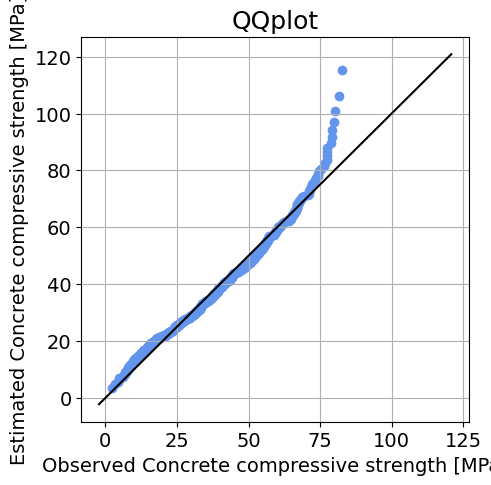

In [8]:
# fig, axes = plt.subplots(1, 1, figsize=(10, 5))

# axes.scatter(YOUR_CODE_HERE, YOUR_CODE_HERE, 
#              color='cornflowerblue', label='Gumbel')
# axes.set_xlabel('Observed '+label)
# axes.set_ylabel('Estimated '+label)
# axes.set_title('QQplot', fontsize=18)
# xlims = axes.get_xlim()
# ylims = axes.get_ylim()
# axes.plot([np.min([xlims[0],ylims[0]]), np.max([xlims[1],ylims[1]])], [np.min([xlims[0],ylims[0]]), np.max([xlims[1],ylims[1]])], 'k')
# axes.grid()

# SOLUTION for the CONCRETE dataset
if dataset == "concrete":
    loc = 28.167
    scale = 13.097
    inverse_cdf = stats.gumbel_r.ppf(ecdf(data)[0], loc, scale)
    distribution_label = 'Gumbel PDF'
    
# SOLUTION for the TEMPERATURE dataset
elif dataset == "temperature":
    loc = 15.727
    scale = 2.911
    inverse_cdf = stats.gumbel_r.ppf(ecdf(data)[0], loc, scale)
    distribution_label = 'Gumbel PDF'


fig, axes = plt.subplots(1, 1, figsize=(5, 5))

axes.scatter(ecdf(data)[1], inverse_cdf, 
             color='cornflowerblue', label=distribution_label)
axes.set_xlabel('Observed '+label)
axes.set_ylabel('Estimated '+label)
axes.set_title('QQplot', fontsize=18)
xlims = axes.get_xlim()
ylims = axes.get_ylim()
axes.plot([np.min([xlims[0],ylims[0]]), np.max([xlims[1],ylims[1]])], [np.min([xlims[0],ylims[0]]), np.max([xlims[1],ylims[1]])], 'k')
axes.grid()
fig.savefig('ppf.svg')

<div style="background-color:#FAE99E; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
    
Solution for the **concrete dataset**:
- *Comparing the PDF*: The fitted distribution approximately follows the bell shape of the observations with a right tail, so Gumbel distribution seems an appropriate choice considering the shape of the PDF.
- *Logscale plot*: This technique allows to visually assess the fitting of the parametric distribution to the tail of the empirical distribution. We can see that the tail of the empirical distribution is not well fitted. The estimated Gumbel distribution provides estimates of the random variable higher than the actual values. If we are concerned about compressive strength, we should be wary that the fitted distribution may be overly optimistic about the frequency of extraordinarily high compressive strength values.
- *QQplot*: Again, we can see that the distribution performs well around the central moments and left tail, but the right tail is not properly fitted.
    
The conclusions reached with this analysis are similar to those obtained in the analytical part (pen and paper), since the techniques are equivalent. We can make use of the computer power to obtain more robust conclusions.

----

Solution for the **temperature dataset**:
- *Comparing the PDF*: The fitted distribution approximately follows the bell shape of the observations with a right tail, so Gumbel distribution seems an appropriate choice considering the shape of the PDF.
- *Logscale plot*: This technique allows to visually assess the fitting of the parametric distribution to the tail of the empirical distribution. We can see that the tail of the empirical distribution is not well fitted. Howvever, note that the y axis is logarithmic, The Gumbel distribution provides estimates of the random variable higher than the actual values in the right tail. It is difficult to discern the performance of the left tail in this figure. Here, if we consider high temperature extremes as dangerous, the estimated distribution is on the safe side: it predicts a *higher* probability of exceeding any given high temperature.
- *QQplot*: Again, we can see that the distribution performs well around the central moments, but the left and right tails are not properly fitted. Specifically, the estimated distribution predicts higher temperatures in the extremes than the observed distribution.
    
The conclusions reached with this analysis are similar to those obtained in the analytical part (pen and paper), since the techniques are equivalent. We can make use of the computer power to obtain more robust conclusions.

</div>

**End of notebook.**

<div style="margin-top: 50px; padding-top: 20px; border-top: 1px solid #ccc;">
  <div style="display: flex; justify-content: flex-end; gap: 20px; align-items: center;">
    <a rel="MUDE" href="http://mude.citg.tudelft.nl/">
      <img alt="MUDE" style="width:100px; height:auto;" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png" />
    </a>
    <a rel="TU Delft" href="https://www.tudelft.nl/en/ceg">
      <img alt="TU Delft" style="width:100px; height:auto;" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png" />
    </a>
    <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">
      <img alt="Creative Commons License" style="width:88px; height:auto;" src="https://i.creativecommons.org/l/by/4.0/88x31.png" />
    </a>
  </div>
  <div style="font-size: 75%; margin-top: 10px; text-align: right;">
    By <a rel="MUDE" href="http://mude.citg.tudelft.nl/">MUDE Team</a>
    &copy; 2024 TU Delft. 
    <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">CC BY 4.0</a>.
    <a rel="Zenodo DOI" href="https://doi.org/10.5281/zenodo.16782515"><img style="width:auto; height:15; vertical-align:middle" src="https://zenodo.org/badge/DOI/10.5281/zenodo.16782515.svg" alt="DOI https://doi.org/10.5281/zenodo.16782515"></a>
  </div>
</div>


<!--tested with WS_2_8_solution.ipynb-->